# Imports and Config

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path

In [69]:
sns.set_theme(style="whitegrid")

# Data

In [2]:
df = pd.read_csv("../data/EL_Stats_Review/panel_format.csv")

# Wrangle

In [45]:
# keep relevant columns
columns_to_keep = [
    # general information
    "Country", "Year", "pop", "Region", "SubRegion",
    # metrics
    'elect_twh', 'electbyfuel_total',
    'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
    'electbyfuel_nuclear', 'electbyfuel_hydro', 'hydro_twh',
    'electbyfuel_ren_power', 'wind_twh', 'solar_twh',
    'electbyfuel_other', 'biogeo_twh',
    'co2_combust_mtco2', 'co2_combust_pc'
]
df_all_countries = df[columns_to_keep].copy()

Text(0, 0.5, 'electricity generation [twh]')

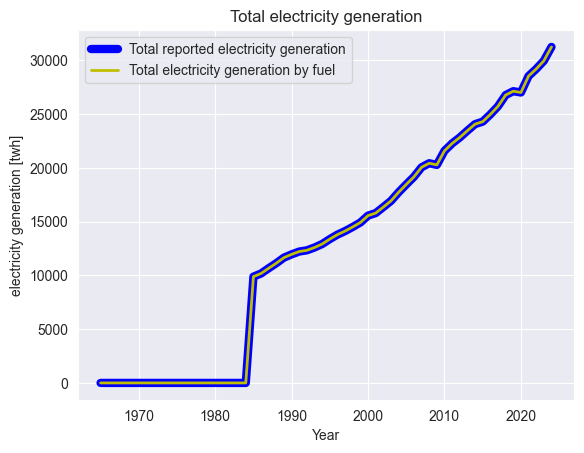

In [65]:
# show electbyfuel line
sns.lineplot(x="Year", y="elect_twh", data=df_all_countries[df_all_countries.Country == "Total World"], color="b", label="Total reported electricity generation", linewidth=6)
sns.lineplot(x="Year", y="electbyfuel_total", data=df_all_countries[df_all_countries.Country == "Total World"], color="y", label="Total electricity generation by fuel", alpha=1, linewidth=2)
plt.legend(loc='upper left')
plt.title("Total electricity generation")
plt.xlabel("Year")
plt.ylabel("electricity generation [twh]")

In [35]:
# remove all years before 1985
df_all_countries = df_all_countries[df_all_countries.Year >= 1985]

In [36]:
# remove all total "countries" (total world, etc.)
df_all_countries = df_all_countries[~df_all_countries['Country'].str.contains('total', case=False)]

In [37]:
# focus on top 20 countries based on electricity production
top20_countries_2024 = df_all_countries[df_all_countries['Year'] == 2024].nlargest(20, 'elect_twh')['Country']
df_top20 = df_all_countries[df_all_countries['Country'].isin(top20_countries_2024)]
top20_countries_2024

1037                 China
7421                    US
2169                 India
5082    Russian Federation
2589                 Japan
714                 Brazil
894                 Canada
5460           South Korea
1803                France
1923               Germany
5142          Saudi Arabia
2289                  Iran
2229             Indonesia
3099                Mexico
7121               Turkiye
3768          Other Africa
7661               Vietnam
5862                Taiwan
5533                 Spain
7361        United Kingdom
Name: Country, dtype: object

In [38]:
# germany and austria
df_ger = df_all_countries[df_all_countries['Country']=="Germany"]
df_aus = df_all_countries[df_all_countries['Country']=="Austria"]

In [39]:
# missing values
df_all_countries.isna().sum()

Country                    0
Year                       0
pop                        0
Region                   585
SubRegion                585
elect_twh                  0
electbyfuel_total          0
electbyfuel_coal           0
electbyfuel_gas            0
electbyfuel_oil            0
electbyfuel_nuclear        0
electbyfuel_hydro          0
hydro_twh                  0
electbyfuel_ren_power      0
wind_twh                   0
solar_twh                  0
electbyfuel_other          0
biogeo_twh                 0
co2_combust_mtco2          0
co2_combust_pc             0
dtype: int64

In [40]:
df_all_countries[df_all_countries.isna().any(axis=1)]

,Country,Year,pop,Region,SubRegion,elect_twh,electbyfuel_total,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,electbyfuel_nuclear,electbyfuel_hydro,hydro_twh,electbyfuel_ren_power,wind_twh,solar_twh,electbyfuel_other,biogeo_twh,co2_combust_mtco2,co2_combust_pc
3729,Other Africa,1985,429.764212,NaN,NaN,65.622338,85.241338,4.111336,18.690,22.384580,0.0,39.677685,38.545685,0.269,0,0,0.108737,0.269,134.932608,0.005536
3730,Other Africa,1986,442.233889,NaN,NaN,68.662666,89.407666,6.090250,18.060,23.942148,0.0,40.550373,39.657373,0.659,0,0,0.105895,0.659,133.352741,0.005403
3731,Other Africa,1987,455.102396,NaN,NaN,71.509025,92.232025,9.454476,19.868,23.672589,0.0,38.469960,37.145960,0.658,0,0,0.109000,0.658,142.168508,0.005507
3732,Other Africa,1988,468.108995,NaN,NaN,75.492120,98.442120,9.416726,20.854,25.833885,0.0,41.602456,40.483456,0.626,0,0,0.109053,0.626,149.986120,0.005668
3733,Other Africa,1989,481.325760,NaN,NaN,78.326330,102.674330,8.748628,23.224,25.925382,0.0,44.030215,42.647215,0.617,0,0,0.129105,0.617,154.219903,0.005753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,Rest of World,2020,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000
4959,Rest of World,2021,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000
4960,Rest of World,2022,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000
4961,Rest of World,2023,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000,0,0,0.000000,0.000,0.000000,0.000000


<Axes: xlabel='Year', ylabel='elect_twh'>

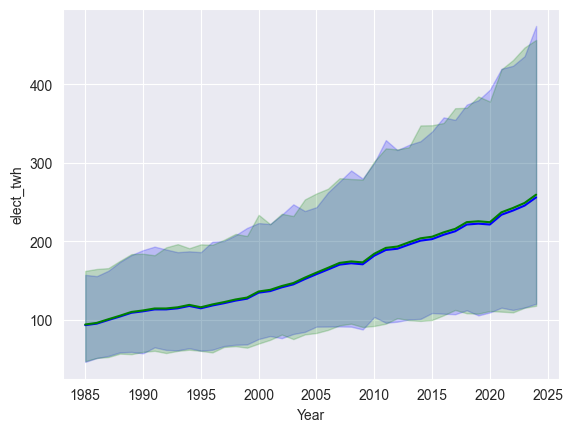

In [41]:
# elect_twh and electbyfuel_total
sns.lineplot(x="Year", y="elect_twh", data=df_all_countries, color="b")
sns.lineplot(x="Year", y="electbyfuel_total", data=df_all_countries, color='g')
# elect twh is total reported electricity production
# electbyfuel_total are all electbyfuel summed up

<Axes: xlabel='Year', ylabel='elect_twh'>

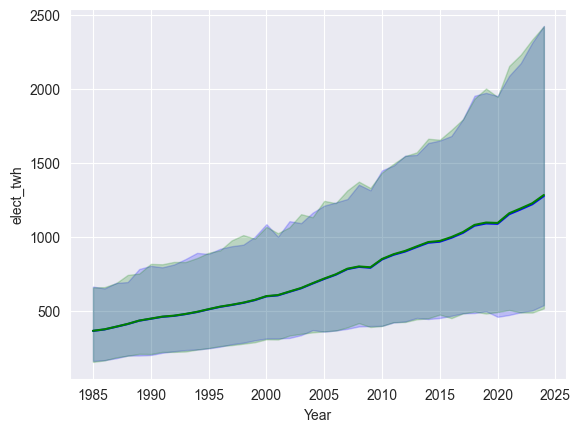

In [42]:
# elect_twh and electbyfuel_total for top 20 countires
sns.lineplot(x="Year", y="elect_twh", data=df_top20, color="b")
sns.lineplot(x="Year", y="electbyfuel_total", data=df_top20, color='g')

# Profile

Text(0.5, 1.0, 'Total electricity generation by fuel for the top 20 countries')

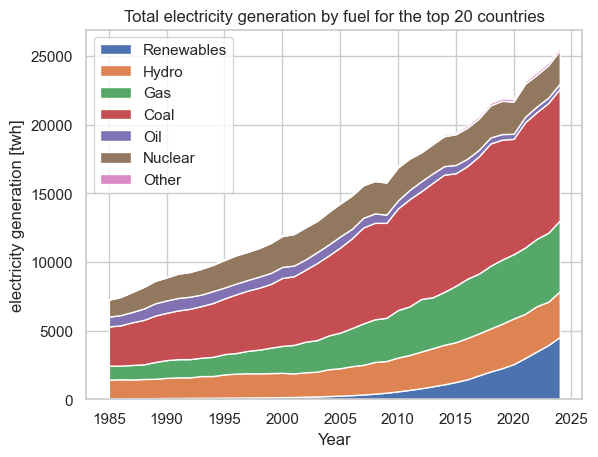

In [70]:
# electricity mix of top 20 countries
df_top20_sum = df_top20.groupby('Year')[[
    'electbyfuel_ren_power',
    'electbyfuel_hydro',
    'electbyfuel_gas',
    'electbyfuel_coal',
    'electbyfuel_oil',
    'electbyfuel_nuclear',
    'electbyfuel_other',
    'electbyfuel_total'
]].sum()

plt.stackplot(
    df_top20_sum.index,
    df_top20_sum.electbyfuel_ren_power,
    df_top20_sum.electbyfuel_hydro,
    df_top20_sum.electbyfuel_gas,
    df_top20_sum.electbyfuel_coal,
    df_top20_sum.electbyfuel_oil,
    df_top20_sum.electbyfuel_nuclear,
    df_top20_sum.electbyfuel_other,
    labels=['Renewables', 'Hydro', 'Gas', 'Coal', 'Oil', 'Nuclear', 'Other']
)
#plt.plot(df_ger.Year, df_top20_sum.electbyfuel_total, color='black', linewidth=1, label='Total')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("electricity generation [twh]")
plt.title("Total electricity generation by fuel for the top 20 countries")

In [89]:
# map of primary energy source
# get the primary energy source of 2024
df_all_countries_2024 = df_all_countries[df_all_countries['Year'] == 2024].copy()
fuel_cols = ['electbyfuel_coal','electbyfuel_gas','electbyfuel_oil',
             'electbyfuel_nuclear','electbyfuel_hydro','electbyfuel_ren_power']
df_all_countries_2024['top_fuel'] = df_all_countries_2024[fuel_cols].idxmax(axis=1)

# prepare world map
world = gpd.read_file("../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

world_topfuel = world.merge(df_all_countries_2024[['Country', 'top_fuel']],
                            left_on='NAME', right_on='Country', how='left')


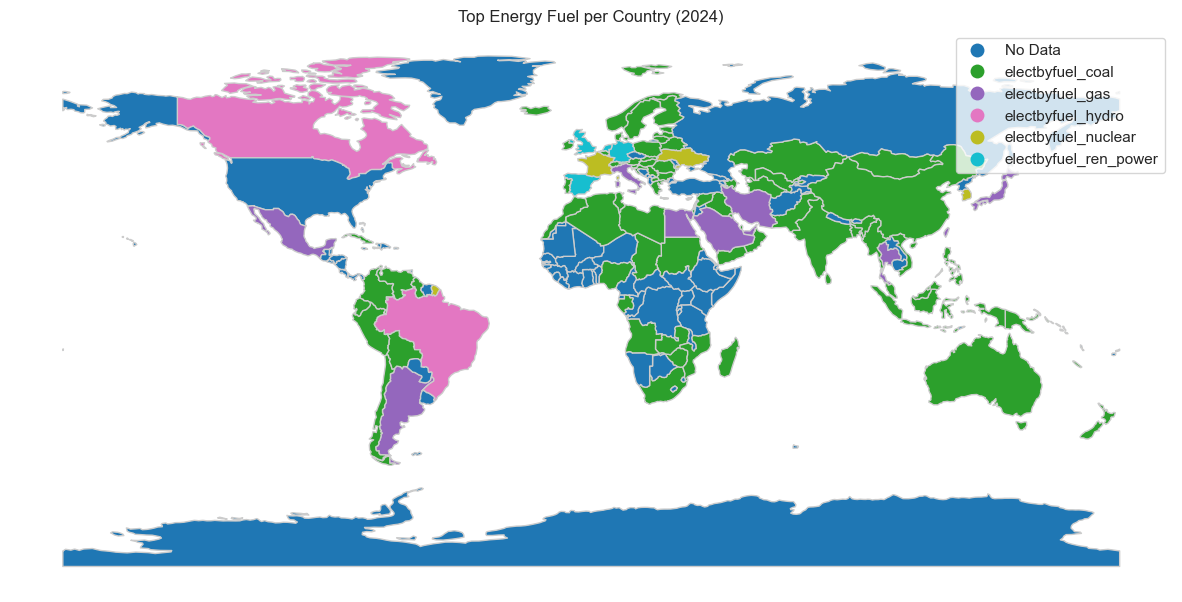

In [100]:
world_topfuel['top_fuel'] = world_topfuel['top_fuel'].fillna('No Data')

fuel_colors = {
    'electbyfuel_coal':'black',
    'electbyfuel_gas':'orange',
    'electbyfuel_oil':'brown',
    'electbyfuel_nuclear':'yellow',
    'electbyfuel_hydro':'blue',
    'electbyfuel_ren_power':'green',
    'No Data':'grey'  # fehlende Länder
}

world_topfuel['top_fuel'] = world_topfuel['top_fuel'].fillna('No Data')

fig, ax = plt.subplots(1,1,figsize=(15,8))
world_topfuel.plot(column='top_fuel',
                   categorical=True,
                   legend=True,
                   edgecolor='0.8',
                   ax=ax)
ax.set_title('Top Energy Fuel per Country (2024)')
ax.set_axis_off()
plt.show()

In [ ]:
# bar charts comparing different countries